In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.api import OLS

In [2]:
# Cargar los datos2
data = pd.read_csv("healthcare_dataset.csv", sep=",")

In [3]:
print(data)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,55500.0,51.539459,19.602454,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,55500.0,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736
Room Number,55500.0,301.134829,115.243069,101.00000,202.000000,302.000000,401.000000,500.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Text(0, 0.5, 'Density')

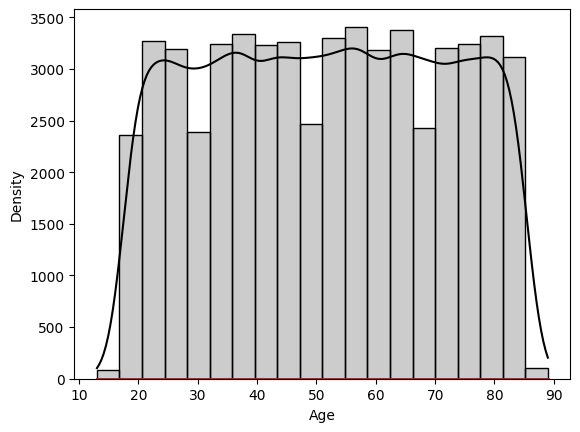

In [19]:
## Histograma con curva de densidad
Age_mean = np.mean(data['Age'])
Age_std = np.std(data['Age'])

# histograma
sns.histplot(data['Age'], kde=True, color='black', alpha=0.2, fill='green', bins=20)

# curva de densidad
from scipy.stats import norm
x_min, x_max = data['Age'].min(), data['Age'].max()
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, Age_mean, Age_std)
plt.plot(x, y, color='red', linewidth=2, label='Normal Distribution')

# nombre de los ejes
plt.xlabel('Age')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

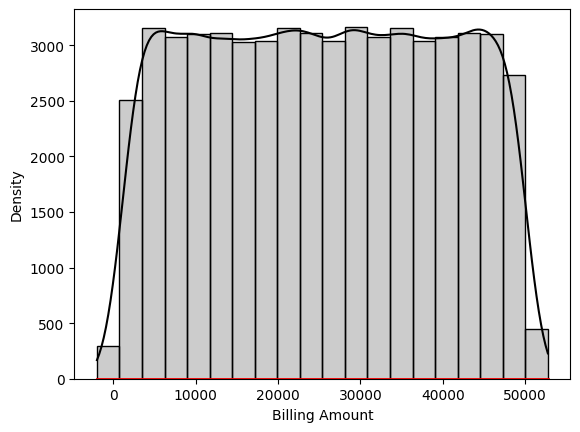

In [23]:
## Histograma con curva de densidad
Billing_mean = np.mean(data['Billing Amount'])
Billing_std = np.std(data['Billing Amount'])

# histograma
sns.histplot(data['Billing Amount'], kde=True, color='black', alpha=0.2, fill='green', bins=20)

# curva de densidad
from scipy.stats import norm
x_min, x_max = data['Billing Amount'].min(), data['Billing Amount'].max()
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, Billing_mean, Billing_std)
plt.plot(x, y, color='red', linewidth=2, label='Normal Distribution')

# nombre de los ejes
plt.xlabel('Billing Amount')
plt.ylabel('Density')

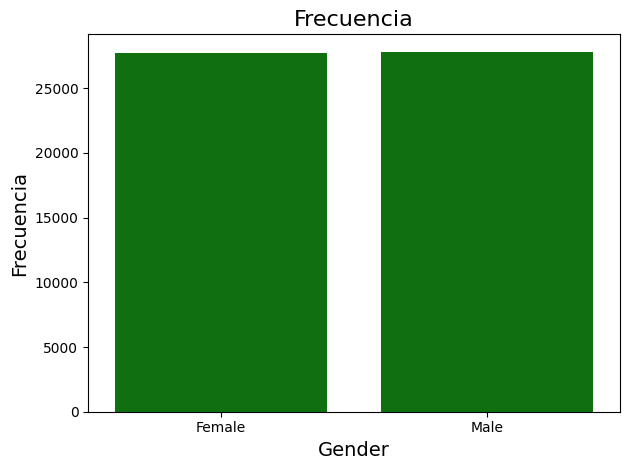

In [20]:
# convertir columna a variable categórica
data['Gender'] = data['Gender'].astype('category')

# Crear bar plot
sns.countplot(x='Gender', data=data, color="green")

plt.xlabel('Gender', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia', fontsize=16)
plt.tight_layout()

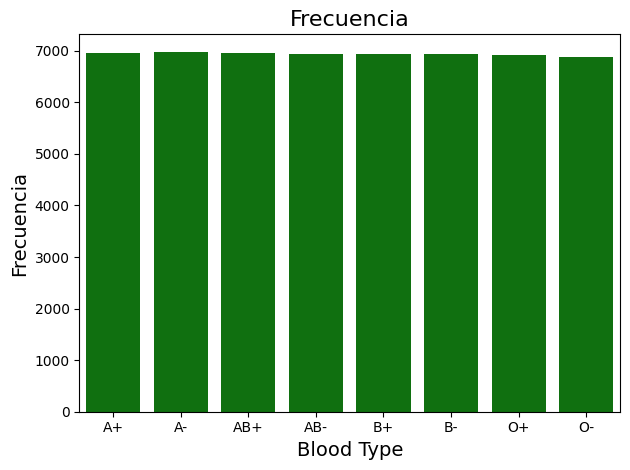

In [21]:
# convertir columna a variable categórica
data['Blood Type'] = data['Blood Type'].astype('category')

# Crear bar plot
sns.countplot(x='Blood Type', data=data, color="green")

plt.xlabel('Blood Type', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia', fontsize=16)
plt.tight_layout()

# Medical Condition

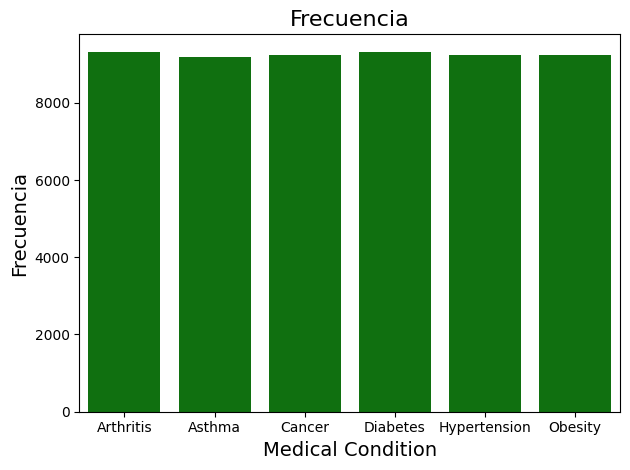

In [22]:
# convertir columna a variable categórica
data['Medical Condition'] = data['Medical Condition'].astype('category')

# Crear bar plot
sns.countplot(x='Medical Condition', data=data, color="green")

plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia', fontsize=16)
plt.tight_layout()

#  Admission Type 

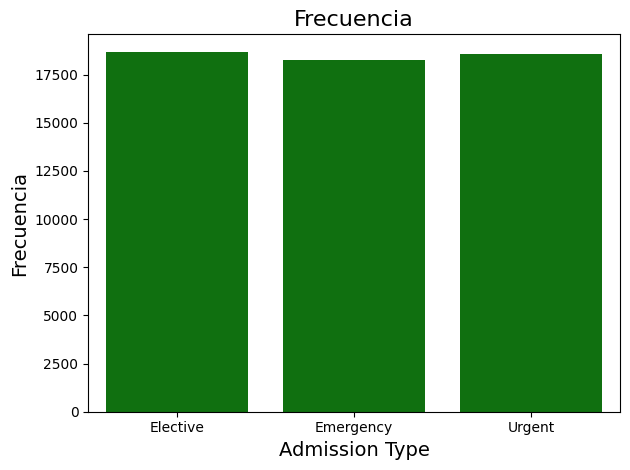

In [25]:
# convertir columna a variable categórica
data['Admission Type'] = data['Admission Type'].astype('category')

# Crear bar plot
sns.countplot(x='Admission Type', data=data, color="green")

plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia', fontsize=16)
plt.tight_layout()

Medication

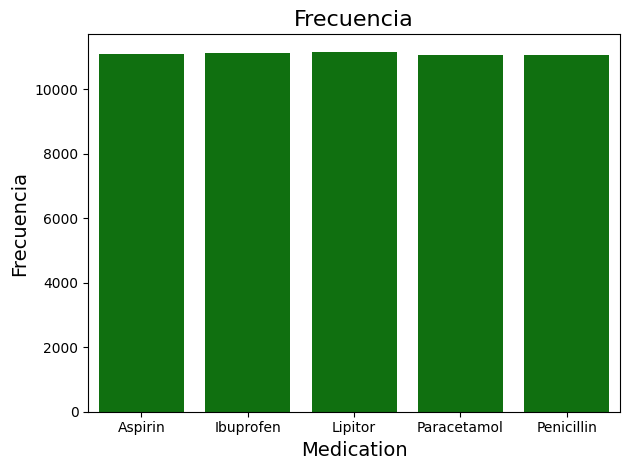

In [26]:
# convertir columna a variable categórica
data['Medication'] = data['Medication'].astype('category')

# Crear bar plot
sns.countplot(x='Medication', data=data, color="green")

plt.xlabel('Medication', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia', fontsize=16)
plt.tight_layout()

Test Results  

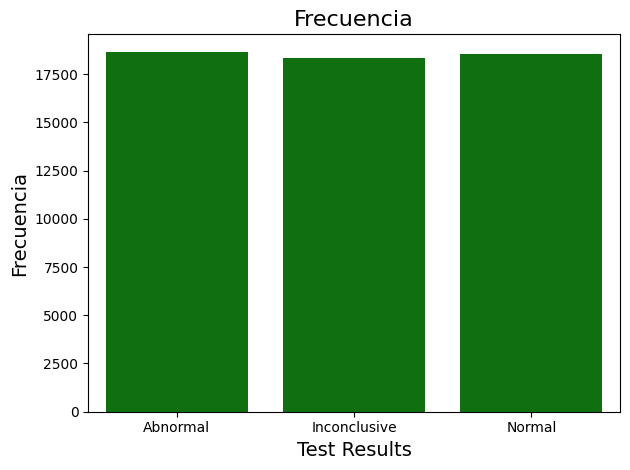

In [27]:
# convertir columna a variable categórica
data['Test Results'] = data['Test Results'].astype('category')

# Crear bar plot
sns.countplot(x='Test Results', data=data, color="green")

plt.xlabel('Test Results', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia', fontsize=16)
plt.tight_layout()

Doctor

In [ ]:
# convertir columna a variable categórica
data['Doctor'] = data['Doctor'].astype('category')

# Crear bar plot
sns.countplot(x='Doctor', data=data, color="green")

plt.xlabel('Doctor', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Frecuencia', fontsize=16)
plt.tight_layout()


KeyboardInterrupt: 

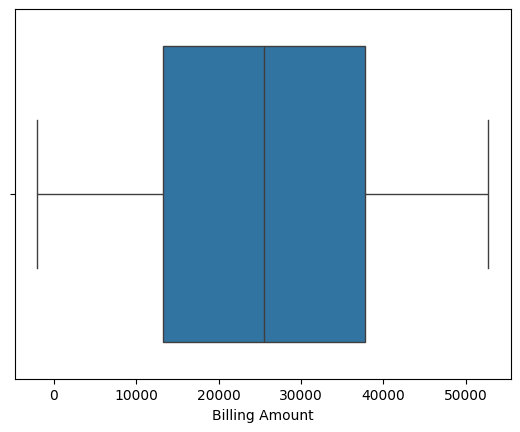

In [4]:
#identificar datos atípicos
sns.boxplot(x=data['Billing Amount'])
plt.show()

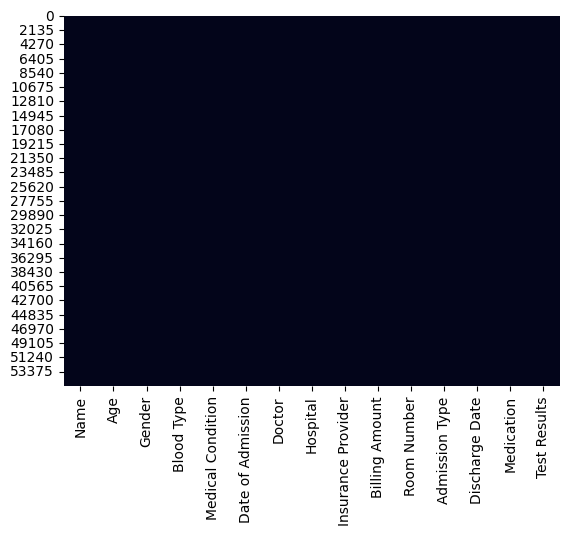

In [6]:
# Verificar si hay datos faltantes
sns.heatmap(data.isnull(), cbar=False)
plt.show()

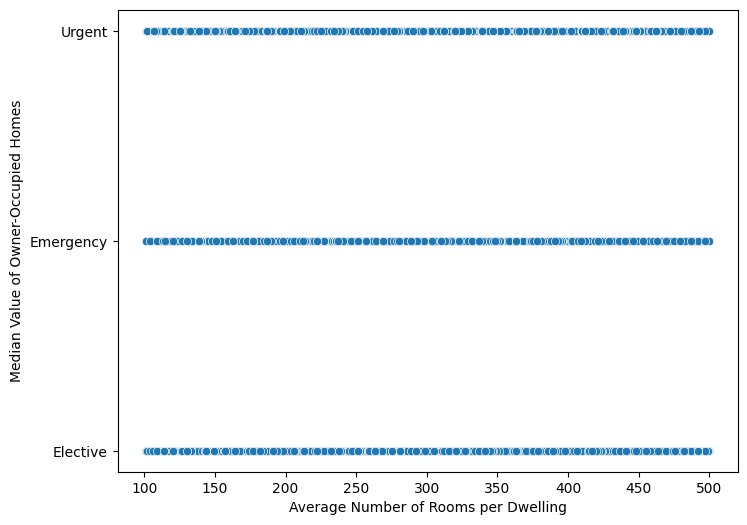

In [7]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Room Number', y='Admission Type', data=data)
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.show()

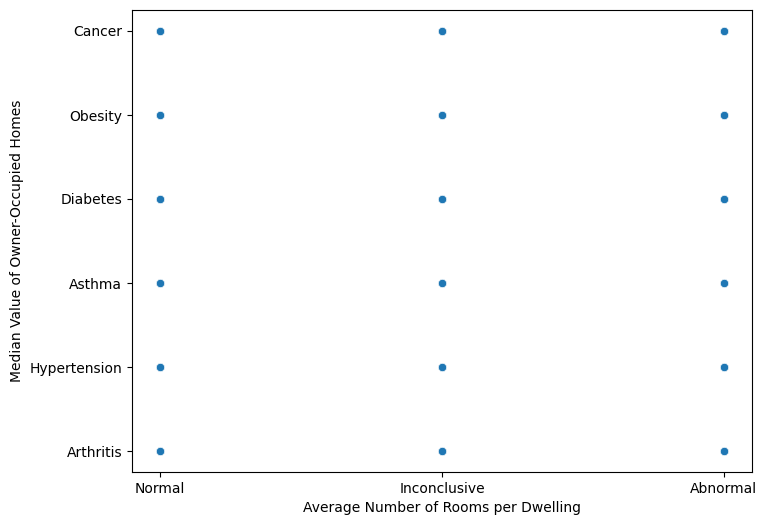

In [8]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Test Results', y='Medical Condition', data=data)
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.show()

In [9]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Bobby JacksOn'

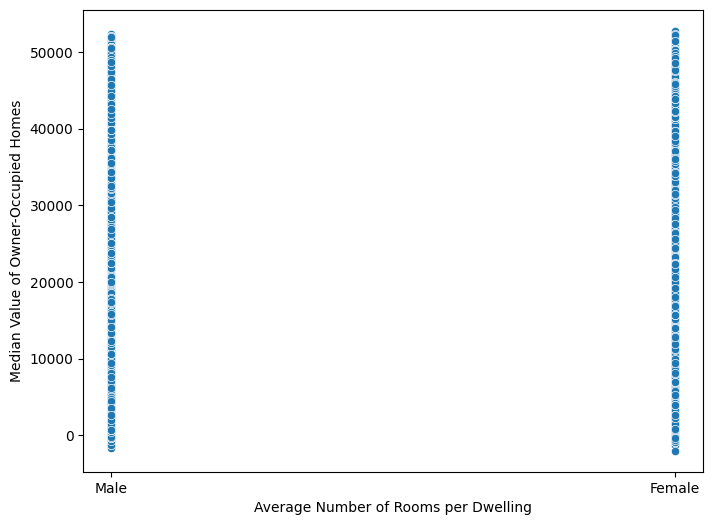

In [13]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gender', y='Billing Amount', data=data)
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.show()

In [14]:
from statsmodels.graphics.mosaicplot import mosaic

Admission Type  Elective  Emergency  Urgent
Gender                                     
Female              9374       9244    9108
Male                9281       9025    9468


<Figure size 640x480 with 0 Axes>

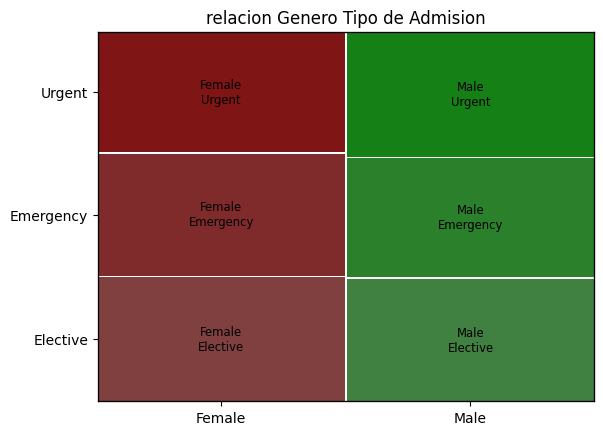

In [27]:
plt.figure()
tablaContingencia = pd.crosstab(data['Gender'],data['Admission Type'])
print(tablaContingencia)

dataDic = tablaContingencia.stack().to_dict()

mosaic(dataDic , title="relacion Genero Tipo de Admision")
plt.show()

# Test Results', y='Medical Condition

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Test Results                                                                 
Abnormal                3188    3009    3118      3168          3012     3132
Inconclusive            3088    3029    3060      3046          3091     3042
Normal                  3032    3147    3049      3090          3142     3057


<Figure size 640x480 with 0 Axes>

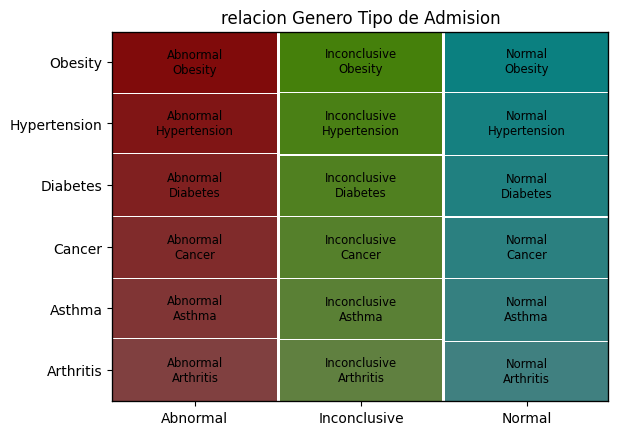

In [24]:
plt.figure()
tablaContingencia = pd.crosstab(data['Test Results'],data['Medical Condition'])
print(tablaContingencia)

dataDic = tablaContingencia.stack().to_dict()

mosaic(dataDic , title="relacion Genero Tipo de Admision")
plt.show()

Medication    Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Test Results                                                      
Abnormal         3732       3747     3707         3737        3704
Inconclusive     3624       3645     3746         3681        3660
Normal           3738       3735     3687         3653        3704


<Figure size 640x480 with 0 Axes>

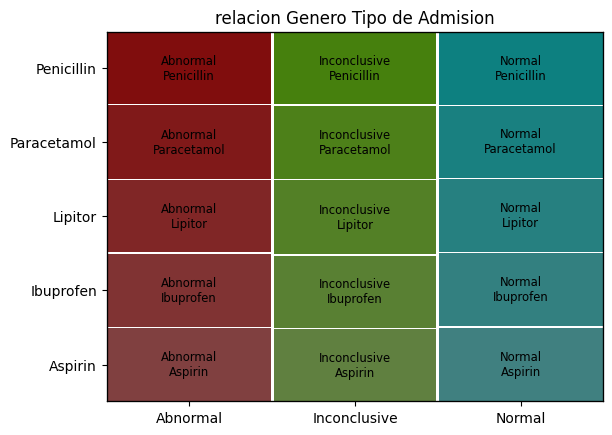

In [28]:
plt.figure()
tablaContingencia = pd.crosstab(data['Test Results'],data['Medication'])
print(tablaContingencia)

dataDic = tablaContingencia.stack().to_dict()

mosaic(dataDic , title="relacion Genero Tipo de Admision")
plt.show()

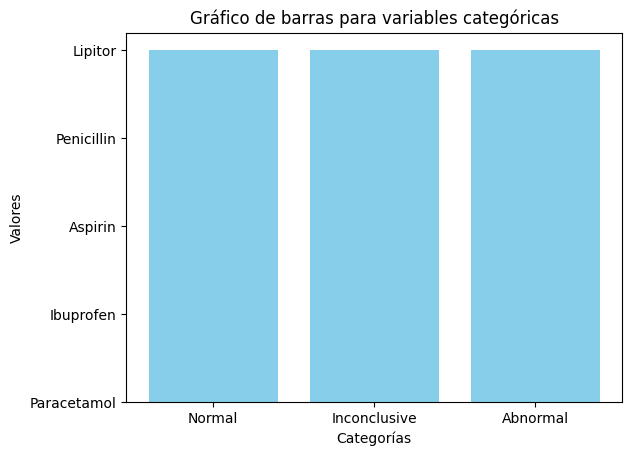

In [32]:
plt.bar(data['Test Results'], data['Medication'].values, color='skyblue')
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Gráfico de barras para variables categóricas')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                55500 non-null  object  
 1   Age                 55500 non-null  int64   
 2   Gender              55500 non-null  category
 3   Blood Type          55500 non-null  category
 4   Medical Condition   55500 non-null  object  
 5   Date of Admission   55500 non-null  object  
 6   Doctor              55500 non-null  object  
 7   Hospital            55500 non-null  object  
 8   Insurance Provider  55500 non-null  object  
 9   Billing Amount      55500 non-null  float64 
 10  Room Number         55500 non-null  int64   
 11  Admission Type      55500 non-null  category
 12  Discharge Date      55500 non-null  object  
 13  Medication          55500 non-null  object  
 14  Test Results        55500 non-null  category
dtypes: category(4), float64(1), int64(2)

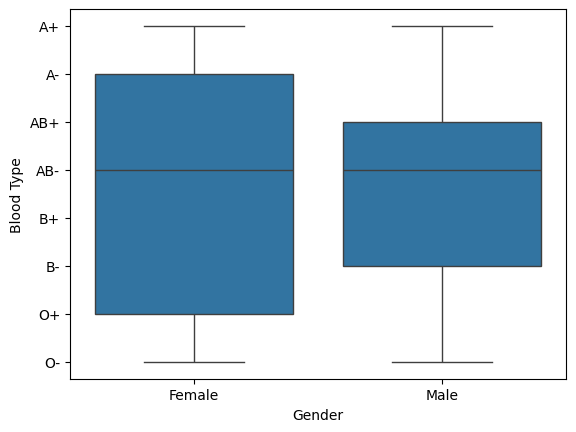

Text(0, 0.5, 'Densidad')

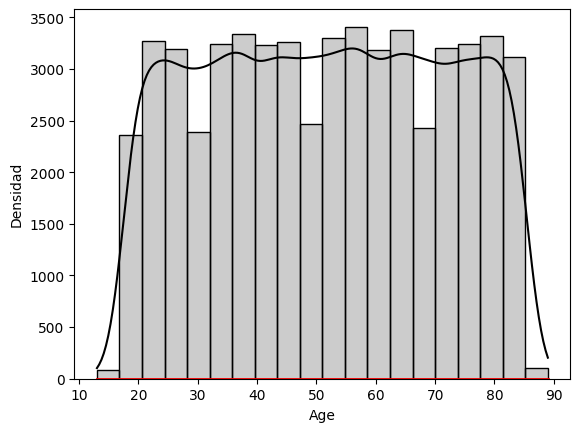

In [33]:
# convertir columna a variable categórica
data['Gender'] = data['Gender'].astype('category')
data['Blood Type'] = data['Blood Type'].astype('category')
data['Admission Type'] = data['Admission Type'].astype('category')
data['Test Results'] = data['Test Results'].astype('category')
data['Age'] = data['Age'].astype('int64')
data['Room Number'] = data['Room Number'].astype('int64')

data.info()
data.describe().T

#identificar datos atípicos
sns.boxplot(x=data['Gender'], y=data['Blood Type'] )
plt.show()

## Histograma con curva de densidad
medv_mean = np.mean(data['Age'])
medv_std = np.std(data['Age'])

# histograma
sns.histplot(data['Age'], kde=True, color='black', alpha=0.2, fill='green', bins=20)

# curva de densidad
from scipy.stats import norm
x_min, x_max = data['Age'].min(), data['Age'].max()
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, medv_mean, medv_std)
plt.plot(x, y, color='red', linewidth=2, label='Normal Distribution')

# nombre de los ejes
plt.xlabel('Age')
plt.ylabel('Densidad')

In [4]:

data3 = data.groupby(['Test Results', 'Medical Condition', 'Admission Type'])['Name'].count().reset_index()
data3 = data3.rename(columns={'Name': 'Cantidad Pacientes'})
print(data3)

    Test Results Medical Condition Admission Type  Cantidad Pacientes
0       Abnormal         Arthritis       Elective                1081
1       Abnormal         Arthritis      Emergency                1019
2       Abnormal         Arthritis         Urgent                1088
3       Abnormal            Asthma       Elective                1036
4       Abnormal            Asthma      Emergency                 947
5       Abnormal            Asthma         Urgent                1026
6       Abnormal            Cancer       Elective                1051
7       Abnormal            Cancer      Emergency                1066
8       Abnormal            Cancer         Urgent                1001
9       Abnormal          Diabetes       Elective                1082
10      Abnormal          Diabetes      Emergency                1001
11      Abnormal          Diabetes         Urgent                1085
12      Abnormal      Hypertension       Elective                1031
13      Abnormal    

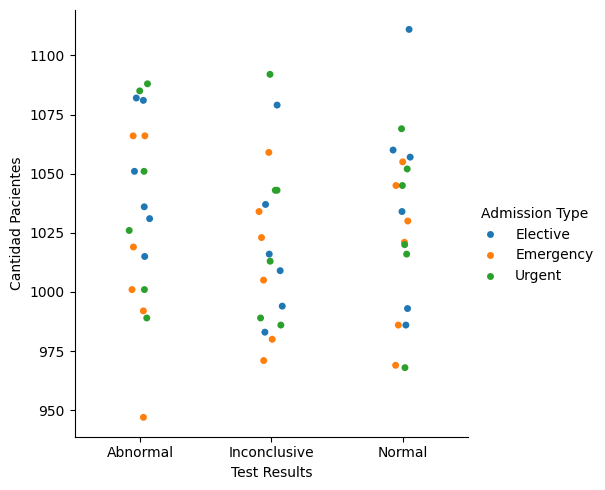

In [18]:
sns.catplot(x="Test Results",y="Cantidad Pacientes", data=data3,
            jitter=True, kind="strip",
            hue="Admission Type")
plt.show()

<Axes: xlabel='Test Results', ylabel='Cantidad Pacientes'>

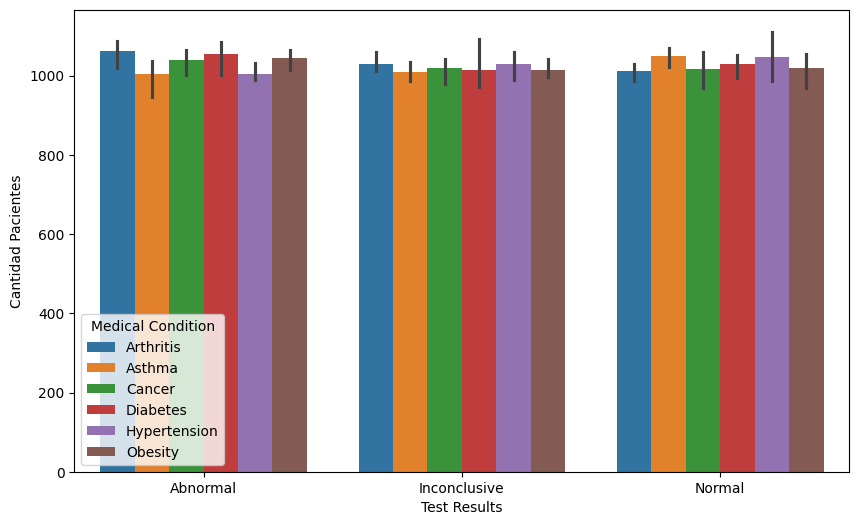

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data3, x='Test Results', y='Cantidad Pacientes', hue='Medical Condition')

In [7]:
dataFemale = data[data['Gender']=="Female"]
dataFemale = dataFemale.groupby(['Test Results', 'Medical Condition', 'Admission Type'])['Name'].count().reset_index()
dataFemale = data3.rename(columns={'Name': 'Cantidad Pacientes'})
print(dataFemale)

dataMale = data[data['Gender']=="Male"]
dataMale = dataMale.groupby(['Test Results', 'Medical Condition', 'Admission Type'])['Name'].count().reset_index()
dataMale = data3.rename(columns={'Name': 'Cantidad Pacientes'})
print(dataMale)

    Test Results Medical Condition Admission Type  Cantidad Pacientes
0       Abnormal         Arthritis       Elective                1081
1       Abnormal         Arthritis      Emergency                1019
2       Abnormal         Arthritis         Urgent                1088
3       Abnormal            Asthma       Elective                1036
4       Abnormal            Asthma      Emergency                 947
5       Abnormal            Asthma         Urgent                1026
6       Abnormal            Cancer       Elective                1051
7       Abnormal            Cancer      Emergency                1066
8       Abnormal            Cancer         Urgent                1001
9       Abnormal          Diabetes       Elective                1082
10      Abnormal          Diabetes      Emergency                1001
11      Abnormal          Diabetes         Urgent                1085
12      Abnormal      Hypertension       Elective                1031
13      Abnormal    

<Axes: xlabel='Test Results', ylabel='Cantidad Pacientes'>

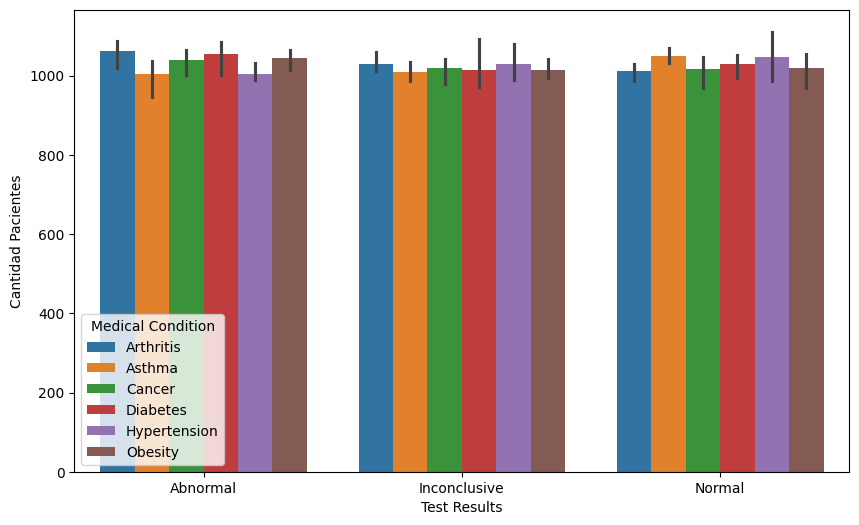

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataFemale, x='Test Results', y='Cantidad Pacientes', hue='Medical Condition')

<Axes: xlabel='Test Results', ylabel='Cantidad Pacientes'>

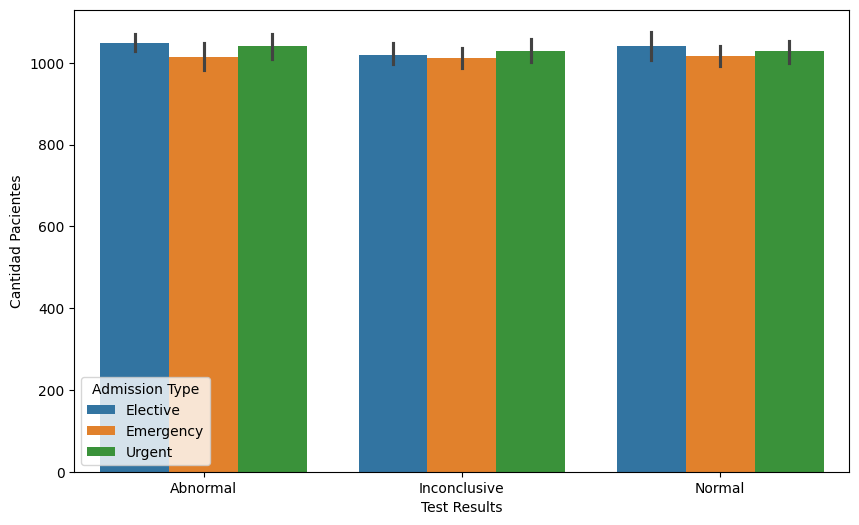

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataFemale, x='Test Results', y='Cantidad Pacientes', hue='Admission Type')

<Axes: xlabel='Test Results', ylabel='Cantidad Pacientes'>

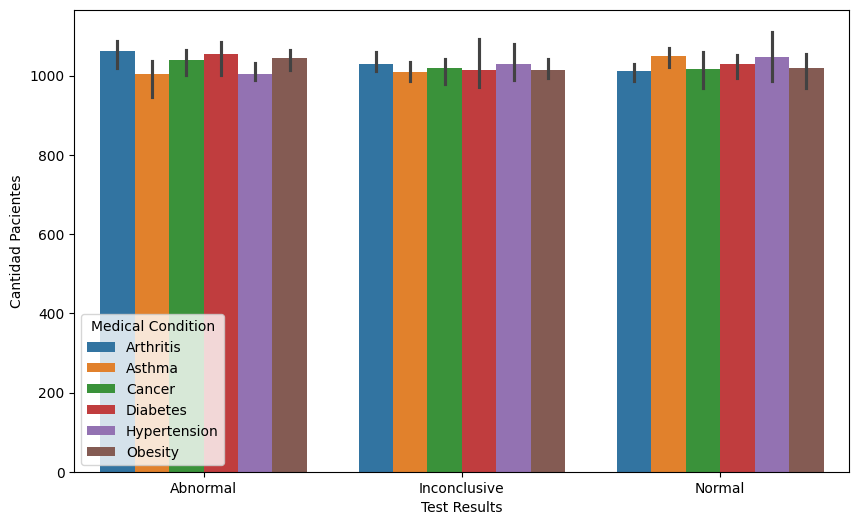

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataMale, x='Test Results', y='Cantidad Pacientes', hue='Medical Condition')

C:\Users\jonat\AppData\Local\Temp\ipykernel_11876\1121211784.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Medical Condition')


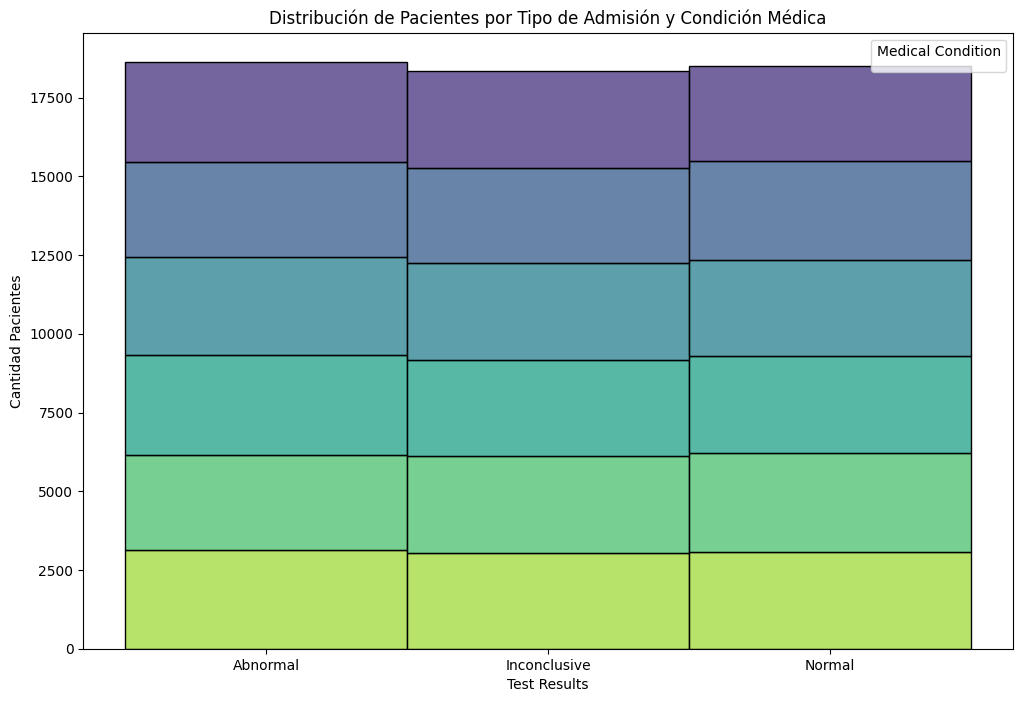

In [10]:
# Ejemplo de transformación de datos: si 'dataFemale' no está en formato largo
# dataFemale = pd.melt(dataFemale, id_vars=['Test Results', 'Medical Condition'], 
#                      value_vars=['Cantidad Pacientes'])

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.histplot(
    data=dataFemale, 
    x='Test Results', 
    weights='Cantidad Pacientes', 
    hue='Medical Condition', 
    multiple='stack',  # Para barras apiladas
    palette="viridis",  # Paleta de colores
    element='bars', 
    hue_order=dataFemale['Medical Condition'].unique()  # Asegura que aparezcan todas las categorías
)

# Personalización
plt.xlabel("Test Results")
plt.ylabel("Cantidad Pacientes")
plt.title("Distribución de Pacientes por Tipo de Admisión y Condición Médica")
plt.legend(title='Medical Condition')

plt.show()

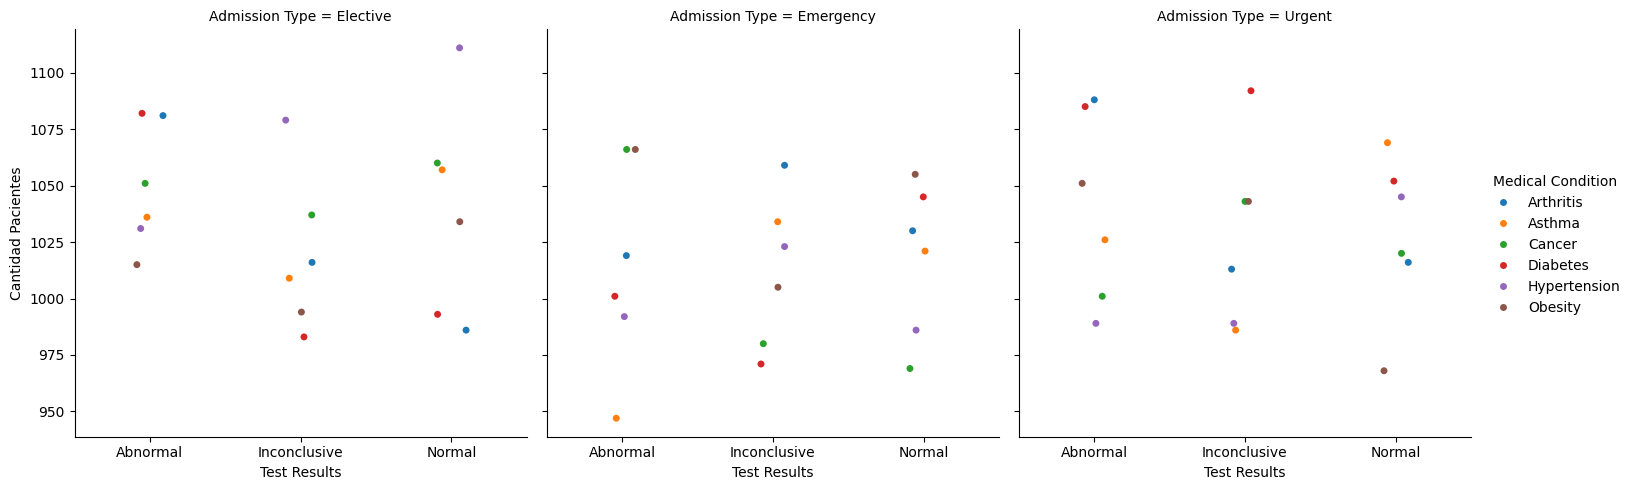

In [22]:
sns.catplot(x="Test Results",y="Cantidad Pacientes", data=dataFemale,
            jitter=True, kind="strip",
            hue="Medical Condition",
            col="Admission Type"
            )
plt.show()

In [29]:
print(data).head()

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

AttributeError: 'NoneType' object has no attribute 'head'

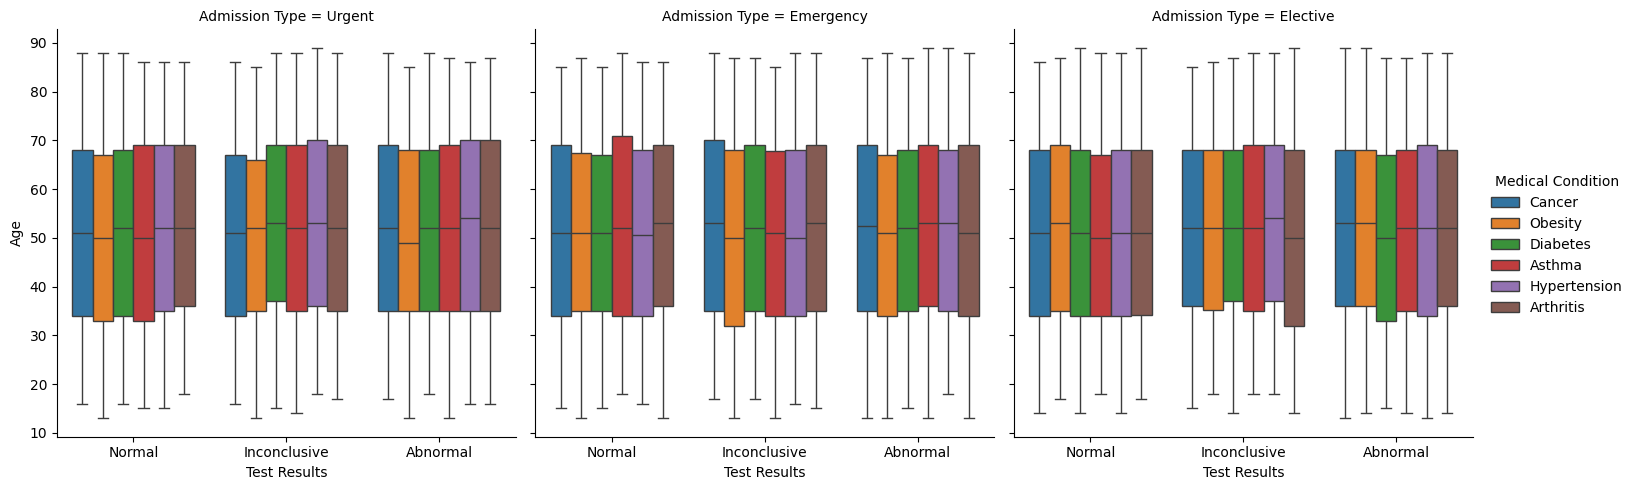

In [32]:
sns.catplot(x="Test Results",y="Age", data=data,
            kind="box",
            hue="Medical Condition",
            col="Admission Type"
            )
plt.show()

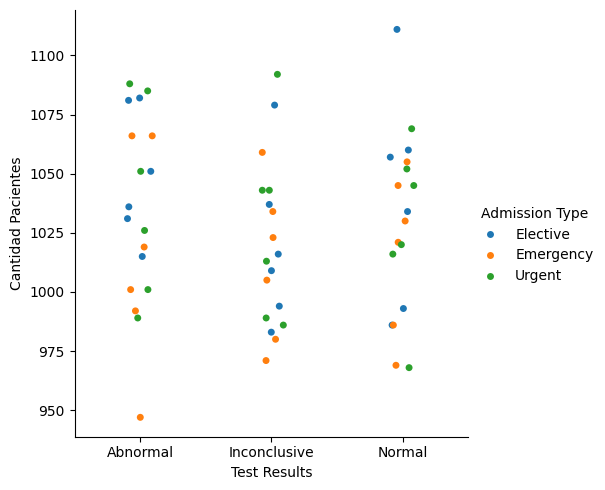

In [20]:
sns.catplot(x="Test Results",y="Cantidad Pacientes", data=dataMale,
            jitter=True, kind="strip",
            hue="Admission Type",
            col="Medical Condition")
plt.show()

https://www.youtube.com/watch?v=ncfPK06nKA8&t=1404s